In [9]:
import pandas as pd
import numpy as np

Import the dataset into pandas

In [15]:
df = pd.read_csv('/Users/sanjayroberts1/Desktop/data_science_tools1/sudeste.csv')

Save df to hdf for easy loading each time. (Tried saving to pickle but apparently there is a bug for saving large files to pickle in pandas)

In [16]:
df.to_hdf('weather.hdf','mydata',mode='w')

In [17]:
df = pd.read_hdf('weather.hdf','mydata')

Take a look at what data we are working with

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
wsid    int64
wsnm    object
elvt    float64
lat     float64
lon     float64
inme    object
city    object
prov    object
mdct    object
date    object
yr      int64
mo      int64
da      int64
hr      int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


Need to change mdct to a datetime object

In [7]:
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


Print out the column names 

In [4]:
df.columns

Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust'],
      dtype='object')

In [5]:
df.elvt.unique()

array([ 237.,    9.,  976.,   38.,   14.,   29.,  129.,   69.,  156.,
        507., 1169., 1018.,  646.,  875.,  189., 1545.,  698.,  493.,
        540., 1048.,  930.,  950.,  782.,  283.,  937.,  559.,  573.,
        854.,  212.,  978.,  878.,  913.,  520.,  467.,  931., 1017.,
       1077., 1281.,  198.,  853.,  288.,  754.,  721., 1359.,  669.,
        454.,  255.,  932.,  641.,  565.,  894.,  505.,  997.,  490.,
        873.,  272.,  850.,  487.,  877.,  609., 1199.,  819.,  411.,
        468.,  705.,  845.,  719., 1200.,   35.,   24.,   60.,    3.,
          7.,   25.,  439., 1758.,  367.,  991.,   30., 1065.,  305.,
        340.,   26.,   20.,   19.,  786.,  636., 1663.,  432., 1003.,
        859.,  743.,  676.,  443.,  399.,  776.,  566.,  461.,  582.,
        510.,  460.,  382.,  408.,  525.,  497.,  734.,  635.,  862.,
        534.,    0.,  660.,  611.,  777.])

In [35]:
df.city.unique()
len(df.city.unique())

117

In [36]:
df.prov.unique()

array(['RJ', 'ES', 'MG', 'SP'], dtype=object)

In [18]:
df[['wsid', 'city','mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp']].head(20)

,wsid,city,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp
0,178,São Gonçalo,2007-11-06 00:00:00,2007-11-06,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3
1,178,São Gonçalo,2007-11-06 01:00:00,2007-11-06,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0
2,178,São Gonçalo,2007-11-06 02:00:00,2007-11-06,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4
3,178,São Gonçalo,2007-11-06 03:00:00,2007-11-06,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8
4,178,São Gonçalo,2007-11-06 04:00:00,2007-11-06,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4
5,178,São Gonçalo,2007-11-06 05:00:00,2007-11-06,2007,11,6,5,NaN,983.7,983.8,983.6,NaN,23.8
6,178,São Gonçalo,2007-11-06 06:00:00,2007-11-06,2007,11,6,6,NaN,983.7,983.7,983.6,NaN,22.0
7,178,São Gonçalo,2007-11-06 07:00:00,2007-11-06,2007,11,6,7,NaN,984.6,984.6,983.7,NaN,19.7
8,178,São Gonçalo,2007-11-06 08:00:00,2007-11-06,2007,11,6,8,NaN,985.7,985.7,984.6,NaN,18.3
9,178,São Gonçalo,2007-11-06 09:00:00,2007-11-06,2007,11,6,9,NaN,986.7,986.7,985.7,214.149,22.9


Shape of the dataframe. We have about 10 million observations

In [20]:
df.shape

(9779168, 31)

In [4]:
df.tail(20)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
9779148,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 04:00:00,2016-09-30,...,14.9,12.3,14.7,11.3,84.0,85.0,80.0,0.0,0.0,0.0
9779149,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 05:00:00,2016-09-30,...,14.9,12.2,14.8,10.9,77.0,84.0,77.0,0.0,0.0,0.0
9779150,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 06:00:00,2016-09-30,...,14.9,11.6,14.6,10.9,81.0,81.0,77.0,0.0,0.0,0.0
9779151,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 07:00:00,2016-09-30,...,14.8,11.8,14.5,11.4,81.0,83.0,81.0,0.0,0.0,0.0
9779152,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 08:00:00,2016-09-30,...,14.9,11.8,14.6,11.3,80.0,82.0,79.0,0.0,0.0,0.0
9779153,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 09:00:00,2016-09-30,...,14.9,11.7,14.2,11.3,82.0,83.0,80.0,0.0,0.0,0.0
9779154,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 10:00:00,2016-09-30,...,15.8,11.4,14.3,11.1,74.0,82.0,74.0,0.0,0.0,0.0
9779155,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 11:00:00,2016-09-30,...,17.7,12.0,15.6,11.0,69.0,75.0,67.0,0.0,0.0,0.0
9779156,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 12:00:00,2016-09-30,...,19.3,12.0,17.1,10.6,60.0,69.0,58.0,0.0,0.0,0.0
9779157,423,BARUERI,777.0,-23.52389,-46.86945,A755,Barueri,SP,2016-09-30 13:00:00,2016-09-30,...,20.5,12.2,18.2,10.6,58.0,64.0,56.0,0.0,0.0,0.0


In [7]:
x = df.columns

In [10]:
x

Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust'],
      dtype='object')

In [23]:
df[['yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp']].head(10)


,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp
0,2007,11,6,0,NaN,982.5,982.5,981.3,NaN,29.3,12.1
1,2007,11,6,1,NaN,983.2,983.2,982.5,NaN,29.0,13.5
2,2007,11,6,2,NaN,983.5,983.5,983.2,NaN,27.4,14.0
3,2007,11,6,3,NaN,983.7,983.7,983.4,NaN,25.8,16.9
4,2007,11,6,4,NaN,983.7,983.8,983.6,NaN,25.4,16.4
5,2007,11,6,5,NaN,983.7,983.8,983.6,NaN,23.8,16.2
6,2007,11,6,6,NaN,983.7,983.7,983.6,NaN,22.0,16.7
7,2007,11,6,7,NaN,984.6,984.6,983.7,NaN,19.7,17.4
8,2007,11,6,8,NaN,985.7,985.7,984.6,NaN,18.3,17.3
9,2007,11,6,9,NaN,986.7,986.7,985.7,214.149,22.9,18.3


In [10]:
df.index

RangeIndex(start=0, stop=9779168, step=1)

Check the data types for each column

In [9]:
df.dtypes

wsid      int64
wsnm     object
elvt    float64
lat     float64
lon     float64
inme     object
city     object
prov     object
mdct     object
date     object
yr        int64
mo        int64
da        int64
hr        int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtype: object

In [11]:
df.isna()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [16]:
df.isna().mean()

wsid    0.000000
wsnm    0.000000
elvt    0.000000
lat     0.000000
lon     0.000000
inme    0.000000
city    0.000000
prov    0.000000
mdct    0.000000
date    0.000000
yr      0.000000
mo      0.000000
da      0.000000
hr      0.000000
prcp    0.856022
stp     0.000000
smax    0.000000
smin    0.000000
gbrd    0.420160
temp    0.000003
dewp    0.000049
tmax    0.000003
dmax    0.000032
tmin    0.000003
dmin    0.000083
hmdy    0.000000
hmax    0.000001
hmin    0.000004
wdsp    0.094646
wdct    0.000000
gust    0.032362
dtype: float64

In [17]:
df.isna().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
mdct          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

In [13]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,1.407984e+06,9.779168e+06,...,9.779142e+06,9.778858e+06,9.779134e+06,9.778361e+06,9.779168e+06,9.779156e+06,9.779124e+06,8.853607e+06,9.779168e+06,9.462694e+06
mean,3.592531e+02,5.940923e+02,-2.023082e+01,-4.464590e+01,2.011164e+03,6.521960e+00,1.575465e+01,1.150000e+01,9.366544e-01,8.804292e+02,...,2.110503e+01,1.524025e+01,1.986418e+01,1.422089e+01,6.726667e+01,6.996991e+01,6.441965e+01,1.998156e+00,1.385991e+02,4.494015e+00
std,3.901630e+01,3.980379e+02,3.172643e+00,4.882117e+00,3.207774e+00,3.425538e+00,8.802154e+00,6.922190e+00,2.923291e+00,2.482650e+02,...,7.545549e+00,5.866811e+00,7.134849e+00,5.777089e+00,2.654213e+01,2.643371e+01,2.656550e+01,1.618531e+00,1.052018e+02,2.981790e+00
min,1.780000e+02,0.000000e+00,-2.496282e+01,-5.667732e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.200000e+00,-1.000000e+01,-8.500000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+02,2.830000e+02,-2.239580e+01,-4.743410e+01,2.009000e+03,4.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,9.113000e+02,...,1.820000e+01,1.270000e+01,1.720000e+01,1.160000e+01,5.300000e+01,5.800000e+01,4.900000e+01,8.000000e-01,5.600000e+01,2.300000e+00
50%,3.580000e+02,5.730000e+02,-2.075041e+01,-4.445378e+01,2.011000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,9.442000e+02,...,2.190000e+01,1.660000e+01,2.080000e+01,1.560000e+01,7.400000e+01,7.800000e+01,7.000000e+01,1.700000e+00,1.140000e+02,4.200000e+00
75%,3.940000e+02,8.750000e+02,-1.891707e+01,-4.243575e+01,2.014000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.000000e-01,9.731000e+02,...,2.580000e+01,1.940000e+01,2.420000e+01,1.840000e+01,8.900000e+01,9.100000e+01,8.600000e+01,2.900000e+00,2.160000e+02,6.300000e+00
max,4.230000e+02,1.758000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.050000e+03,...,4.500000e+01,4.480000e+01,4.500000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.980000e+01,3.600000e+02,5.000000e+01


Group by weather stations

In [19]:
groups = df.groupby('wsid')

In [20]:
groups.ngroups

122

Get data from one weather station

In [4]:
is_178 = df['wsid'] == 178

In [5]:
w_station_178 = df[is_178]

In [34]:
w_station_178.columns


Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust'],
      dtype='object')

Drop columns

In [6]:
w_station_178 = w_station_178[['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'city', 'mdct',
           'prcp', 'stp', 'smax', 'smin', 'temp', 'tmax', 'tmin', 
           'hmdy', 'hmax', 'hmin','wdsp', 'wdct']]

In [7]:
old_names = w_station_178.columns

In [8]:
new_names = ['id', 'name', 'elvt', 'lat', 'lon', 'city', 'date',
           'rain', 'air_press', 'max_air_press', 'min_air_press', 'temp', 'max_temp', 'min_temp', 
           'humidity', 'hmax', 'hmin','wind_speed', 'wind_dir']

In [9]:
w_station_178.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [15]:

#plt.scatter(x=w_station_178['date'], y=w_station_178['temp'])
#plt.show()

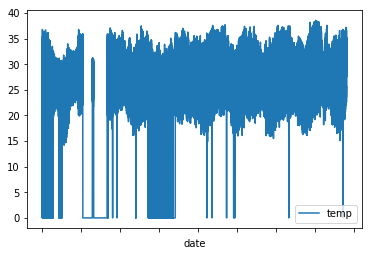

In [16]:
w_station_178.plot(x='date', y='temp')


In [17]:
7*

168

In [18]:
first_400 = w_station_178.head(400)
first_400

,id,name,elvt,lat,lon,city,date,rain,air_press,max_air_press,min_air_press,temp,max_temp,min_temp,humidity,hmax,hmin,wind_speed,wind_dir
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,29.3,29.7,25.5,35.0,58.0,32.0,3.2,101.0
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,29.0,29.9,29.0,39.0,39.0,35.0,3.6,94.0
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,27.4,29.0,27.4,44.0,44.0,39.0,2.5,93.0
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,25.8,27.4,25.8,58.0,58.0,44.0,1.7,96.0
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,25.4,26.3,25.3,57.0,58.0,56.0,3.1,110.0
5,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 05:00:00,NaN,983.7,983.8,983.6,23.8,25.4,23.8,62.0,62.0,57.0,2.0,99.0
6,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 06:00:00,NaN,983.7,983.7,983.6,22.0,23.8,22.0,72.0,72.0,62.0,1.3,93.0
7,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 07:00:00,NaN,984.6,984.6,983.7,19.7,22.0,19.5,86.0,89.0,72.0,0.5,157.0
8,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 08:00:00,NaN,985.7,985.7,984.6,18.3,19.7,18.3,93.0,94.0,85.0,NaN,141.0
9,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,São Gonçalo,2007-11-06 09:00:00,NaN,986.7,986.7,985.7,22.9,22.9,18.2,75.0,94.0,75.0,NaN,248.0


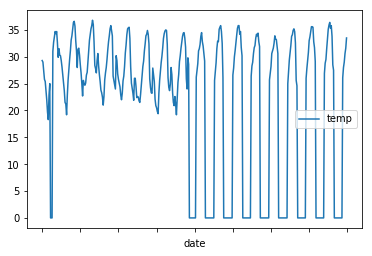

In [19]:
first_400.plot(x='date', y='temp')


About 2 weeks of data from sept 15 - sept 30, 2016

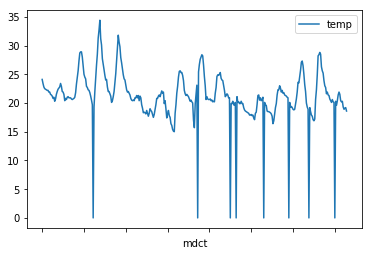

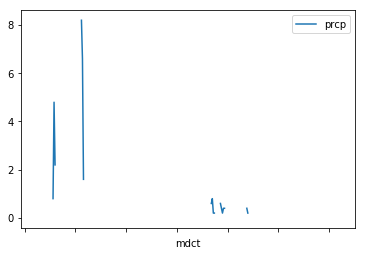

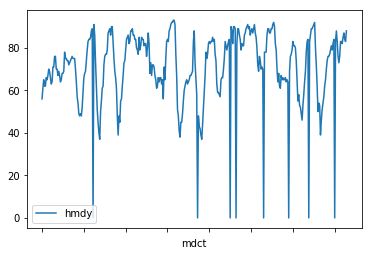

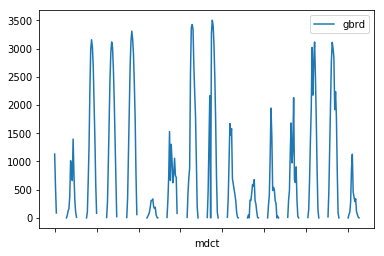

In [85]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365.plot(x='mdct', y='temp')
station_384_tail_365.plot(x='mdct', y='prcp')
station_384_tail_365.plot(x='mdct', y='hmdy')
station_384_tail_365.plot(x='mdct', y='gbrd')




Set index to time

In [86]:
station_384_tail_365 = station_384_tail_365.set_index('mdct')

In [87]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(station_384_tail_365)


,wsid,wsnm,elvt,lat,lon,inme,city,prov,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
mdct,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-15 19:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,19,NaN,1012.7,1012.7,1011.7,1131.838,24.1,14.7,25.1,14.7,24.1,11.5,56.0,56.0,49.0,3.7,251.0,9.3
2016-09-15 20:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,20,NaN,1013.4,1013.4,1012.7,541.710,23.4,15.5,24.3,15.6,23.3,14.4,61.0,61.0,57.0,3.5,254.0,8.3
2016-09-15 21:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,21,NaN,1014.3,1014.3,1013.4,87.492,22.8,15.7,23.5,16.0,22.7,15.0,65.0,65.0,64.0,2.7,251.0,7.5
2016-09-15 22:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,22,NaN,1015.0,1015.0,1014.3,NaN,22.5,14.9,22.8,15.7,22.5,14.8,62.0,65.0,62.0,2.2,263.0,6.2
2016-09-15 23:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-15,2016,9,15,23,NaN,1016.0,1016.0,1015.0,NaN,22.4,14.8,22.6,15.0,22.3,14.6,62.0,63.0,62.0,1.6,257.0,4.5
2016-09-16 00:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,0,NaN,1016.5,1016.5,1016.0,NaN,22.3,15.6,22.4,15.6,22.2,14.7,66.0,66.0,65.0,2.1,263.0,4.7
2016-09-16 01:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,1,NaN,1016.8,1016.8,1016.5,NaN,22.2,15.3,22.3,15.7,22.1,15.2,65.0,66.0,65.0,1.1,264.0,4.0
2016-09-16 02:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,2,NaN,1016.7,1016.9,1016.7,NaN,22.2,15.8,22.2,15.8,22.1,15.3,67.0,67.0,67.0,0.6,217.0,3.1
2016-09-16 03:00:00,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2016-09-16,2016,9,16,3,NaN,1016.4,1016.7,1016.5,NaN,21.9,16.2,22.2,16.2,21.9,15.7,70.0,70.0,68.0,1.4,257.0,3.0


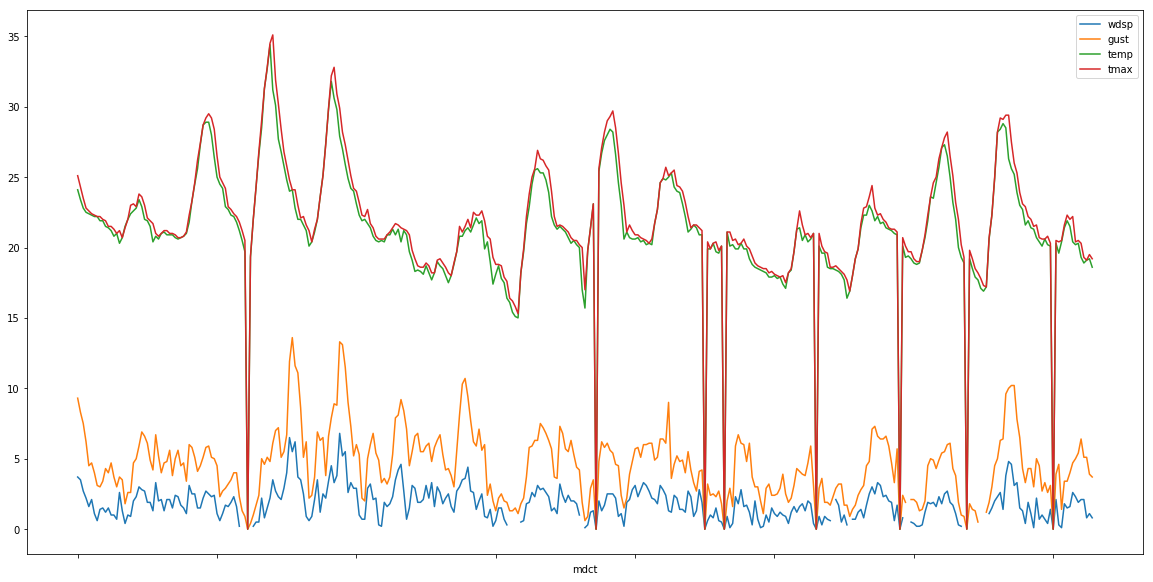

In [93]:
import matplotlib.pyplot as plt

# Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (20, 10)

# Plot the first 500 entries with selected columns
station_384_tail_365[['wdsp', 'gust', 'temp', 'tmax']].plot()


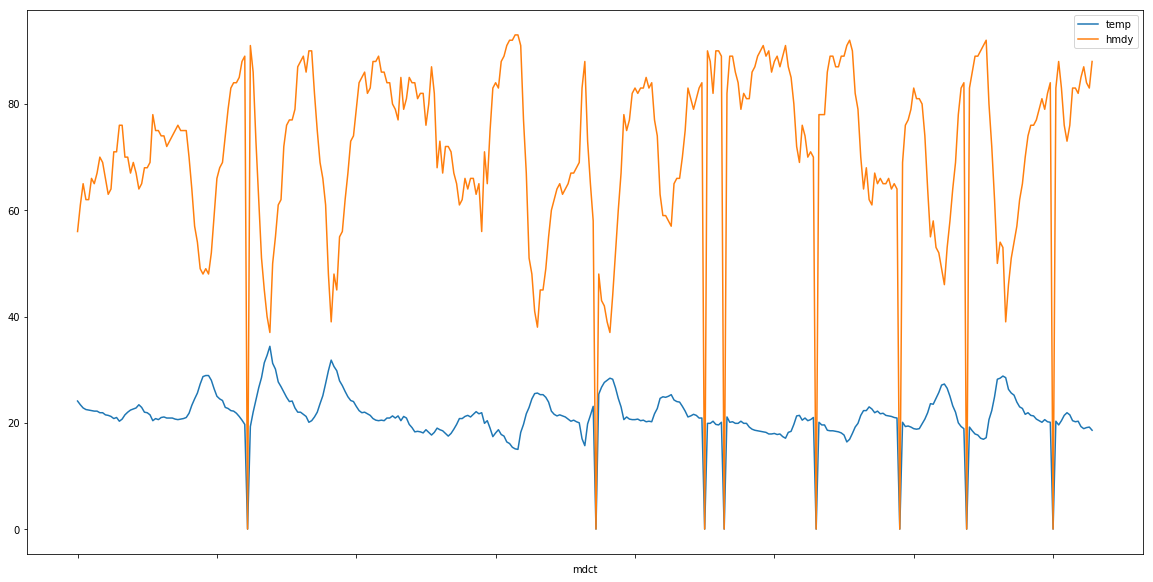

In [96]:
plt.rcParams['figure.figsize'] = (20, 10)
station_384_tail_365[['temp', 'hmdy']].plot()

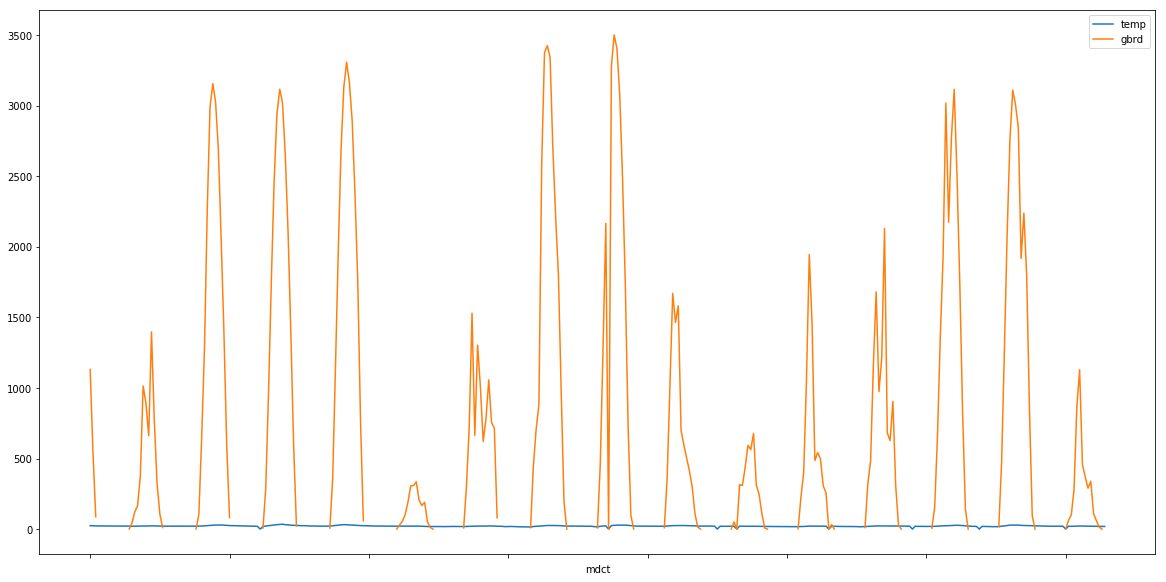

In [95]:
plt.rcParams['figure.figsize'] = (20, 10)

# Plot the first 500 entries with selected columns
station_384_tail_365[['temp', 'gbrd']].plot()

Do we need to normalize the data before graphing?

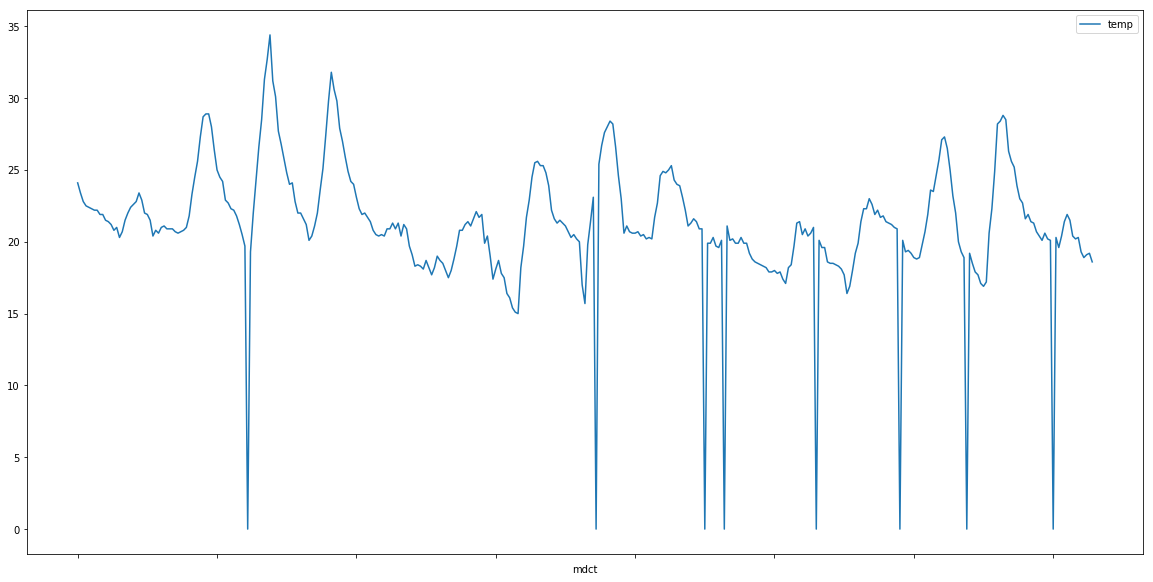

In [97]:
plt.rcParams['figure.figsize'] = (20, 10)
station_384_tail_365[['temp']].plot()

- Attempting interpolation for temperature --> changing all 0's to NaNs first, then filling in missing values
- Or should we just fill forward/backward values?

In [100]:
station_384_temp = station_384_tail_365['temp']
station_384_temp.replace(0, np.nan, inplace=True)

In [101]:
station_384_temp

mdct
2016-09-15 19:00:00    24.1
2016-09-15 20:00:00    23.4
2016-09-15 21:00:00    22.8
2016-09-15 22:00:00    22.5
2016-09-15 23:00:00    22.4
2016-09-16 00:00:00    22.3
2016-09-16 01:00:00    22.2
2016-09-16 02:00:00    22.2
2016-09-16 03:00:00    21.9
2016-09-16 04:00:00    21.9
2016-09-16 05:00:00    21.5
2016-09-16 06:00:00    21.4
2016-09-16 07:00:00    21.2
2016-09-16 08:00:00    20.8
2016-09-16 09:00:00    21.0
2016-09-16 10:00:00    20.3
2016-09-16 11:00:00    20.7
2016-09-16 12:00:00    21.5
2016-09-16 13:00:00    22.0
2016-09-16 14:00:00    22.4
2016-09-16 15:00:00    22.6
2016-09-16 16:00:00    22.8
2016-09-16 17:00:00    23.4
2016-09-16 18:00:00    22.9
2016-09-16 19:00:00    22.0
2016-09-16 20:00:00    21.9
2016-09-16 21:00:00    21.5
2016-09-16 22:00:00    20.4
2016-09-16 23:00:00    20.8
2016-09-17 00:00:00    20.6
2016-09-17 01:00:00    21.0
2016-09-17 02:00:00    21.1
2016-09-17 03:00:00    20.9
2016-09-17 04:00:00    20.9
2016-09-17 05:00:00    20.9
2016-09-17 06:0

Graph of temps pre-interpolation

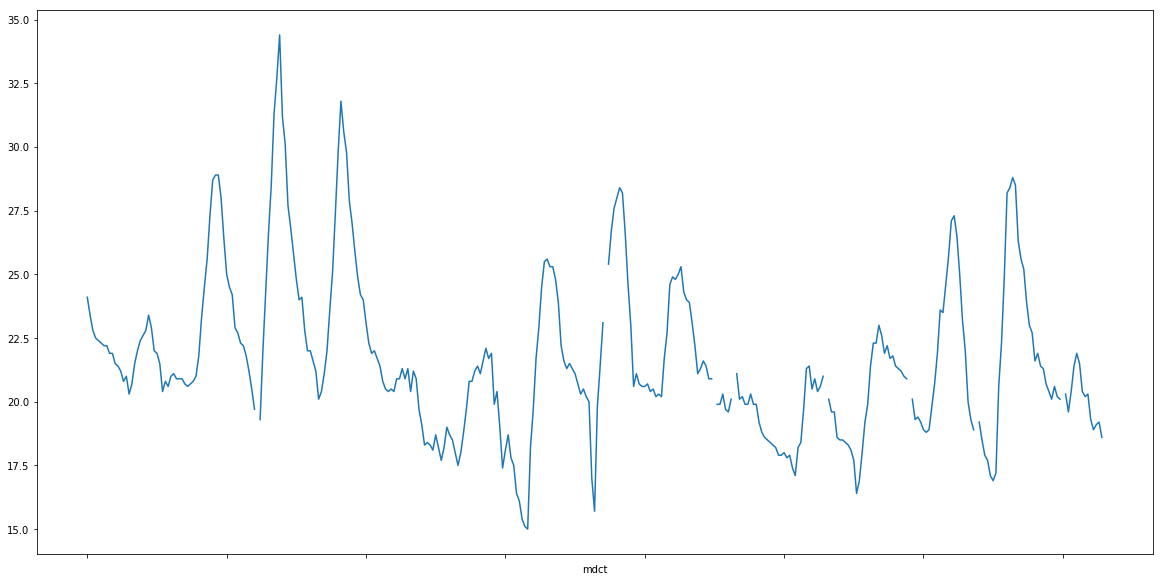

In [102]:
plt.rcParams['figure.figsize'] = (20, 10)
station_384_temp.plot()

In [110]:
station_384_temp.index = pd.to_datetime(station_384_temp.index)

In [112]:
#station_384_temp['mdct'] = station_384_temp['mdct'].astype('datetime64[ns]')

In [113]:
# Interpolate data to fill empty values    
station_384_temp.interpolate('time', inplace=True, limit_direction='both')
station_384_temp

mdct
2016-09-15 19:00:00    24.10
2016-09-15 20:00:00    23.40
2016-09-15 21:00:00    22.80
2016-09-15 22:00:00    22.50
2016-09-15 23:00:00    22.40
2016-09-16 00:00:00    22.30
2016-09-16 01:00:00    22.20
2016-09-16 02:00:00    22.20
2016-09-16 03:00:00    21.90
2016-09-16 04:00:00    21.90
2016-09-16 05:00:00    21.50
2016-09-16 06:00:00    21.40
2016-09-16 07:00:00    21.20
2016-09-16 08:00:00    20.80
2016-09-16 09:00:00    21.00
2016-09-16 10:00:00    20.30
2016-09-16 11:00:00    20.70
2016-09-16 12:00:00    21.50
2016-09-16 13:00:00    22.00
2016-09-16 14:00:00    22.40
2016-09-16 15:00:00    22.60
2016-09-16 16:00:00    22.80
2016-09-16 17:00:00    23.40
2016-09-16 18:00:00    22.90
2016-09-16 19:00:00    22.00
2016-09-16 20:00:00    21.90
2016-09-16 21:00:00    21.50
2016-09-16 22:00:00    20.40
2016-09-16 23:00:00    20.80
2016-09-17 00:00:00    20.60
2016-09-17 01:00:00    21.00
2016-09-17 02:00:00    21.10
2016-09-17 03:00:00    20.90
2016-09-17 04:00:00    20.90
2016-09-1

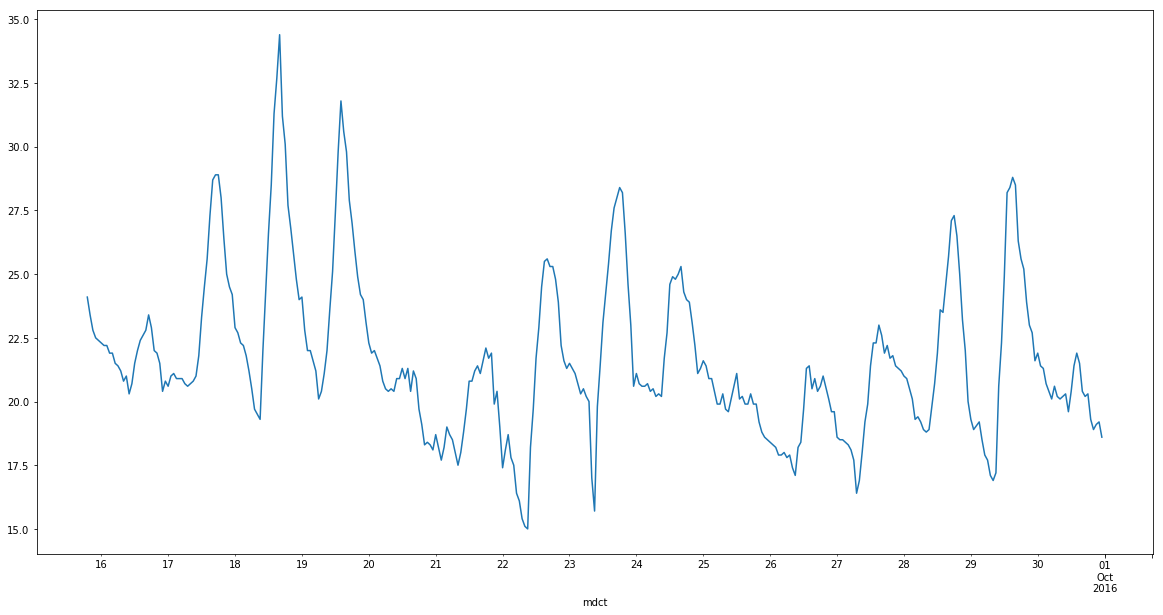

In [114]:
plt.rcParams['figure.figsize'] = (20, 10)
station_384_temp.plot()

Break it down to a day sept 16th

In [119]:
station_384_temp_sept_oct = station_384_temp.head(24)

In [120]:
station_384_temp_sept_oct

mdct
2016-09-15 19:00:00    24.1
2016-09-15 20:00:00    23.4
2016-09-15 21:00:00    22.8
2016-09-15 22:00:00    22.5
2016-09-15 23:00:00    22.4
2016-09-16 00:00:00    22.3
2016-09-16 01:00:00    22.2
2016-09-16 02:00:00    22.2
2016-09-16 03:00:00    21.9
2016-09-16 04:00:00    21.9
2016-09-16 05:00:00    21.5
2016-09-16 06:00:00    21.4
2016-09-16 07:00:00    21.2
2016-09-16 08:00:00    20.8
2016-09-16 09:00:00    21.0
2016-09-16 10:00:00    20.3
2016-09-16 11:00:00    20.7
2016-09-16 12:00:00    21.5
2016-09-16 13:00:00    22.0
2016-09-16 14:00:00    22.4
2016-09-16 15:00:00    22.6
2016-09-16 16:00:00    22.8
2016-09-16 17:00:00    23.4
2016-09-16 18:00:00    22.9
Name: temp, dtype: float64

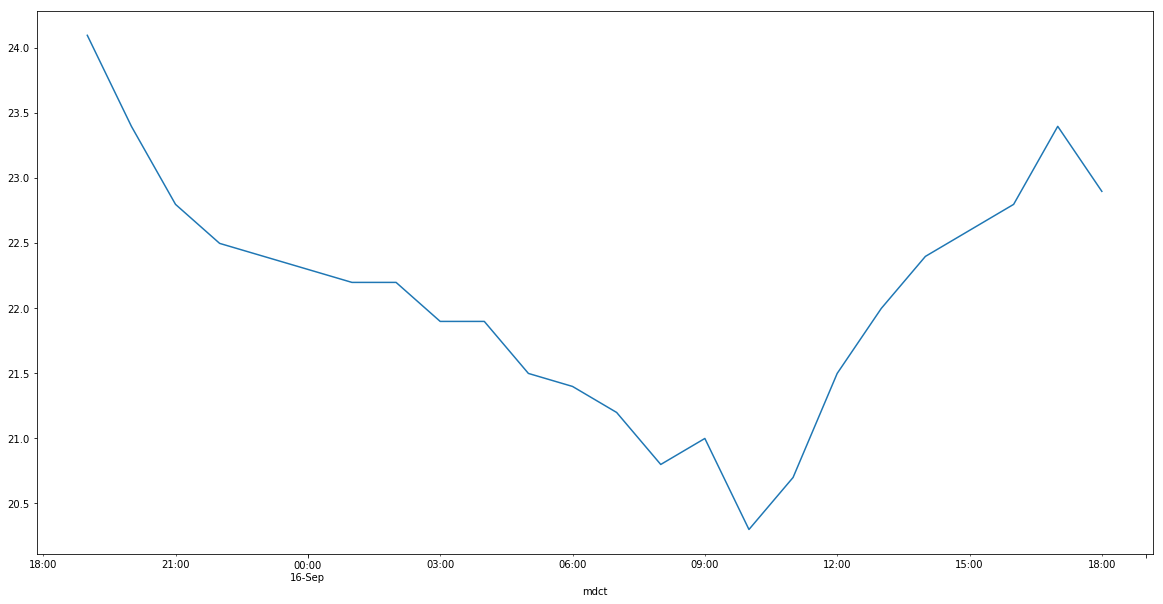

In [121]:
plt.rcParams['figure.figsize'] = (20, 10)
station_384_temp_sept_oct.plot()

To make this run faster, do we need to get daily averages? And plot those instead?

Some 0 temps occur randomly in dataset. Should we drop values? Or use interpolate?

In [ ]:
w_station_178

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
w_station_178.describe()

We could grab each individual weather station, and do the temp analysis above and plot all on the same graph. Need to figure out what to do with bad data first

In [ ]:
df.wsid.unique()

- Separate data for each station
- Each station may have it's own issues for data cleanup, so we separate and apply a cleanup function for each

In [25]:
individual_stations = {}
for each in df.wsid.unique():
    is_ = df['wsid'] == each
    k = str(each)
    individual_stations[k] = df[is_]

In [32]:
individual_stations.keys()

dict_keys(['178', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423'])

# Since we have day, month, year columns --> groupby and find averages for each and plot?

Could do averages of provinces also since there are only 4

In [ ]:
# Plot compare Mean Wind and Max Gust and group by different elevation bins?

In [ ]:
df.elvt.unique()

In [ ]:
#Plot mean temperature with mean humidity

In [ ]:
#Plot of min, max and mean pressure for San Francisco

In [ ]:
# Plot of Rain and humidity

In [ ]:
# Solar radiation vs precipitation (does potential cloud cover from precipitation cause 
# lowered solar )

In [ ]:
#Find two stations (lat and lon) that are very close to each other and see how different readings are

Cross correlation time lag
- get recent weather from one station

In [48]:
dfx = df[(df['wsid']==384) & (df['mdct'] > '2015-01-01 00:00:00')  ]
dfx.head(5)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
6842217,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2015-01-01 01:00:00,2015-01-01,...,26.1,20.7,25.2,19.8,72.0,74.0,70.0,0.3,218.0,4.5
6842218,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2015-01-01 02:00:00,2015-01-01,...,25.6,21.1,24.6,19.8,80.0,80.0,70.0,0.6,36.0,1.1
6842219,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2015-01-01 03:00:00,2015-01-01,...,25.5,21.0,24.4,19.8,74.0,81.0,71.0,0.4,106.0,2.7
6842220,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2015-01-01 04:00:00,2015-01-01,...,25.6,20.5,24.7,18.9,72.0,77.0,66.0,0.8,114.0,2.2
6842221,384,VILA MILITAR,30.0,-22.861322,-43.41141,A621,Rio de Janeiro,RJ,2015-01-01 05:00:00,2015-01-01,...,25.2,20.1,23.6,19.1,77.0,79.0,70.0,1.1,36.0,2.3


Get only the time, temperature, and humidity

In [49]:
fields = ['mdct','temp','hmdy'] # mdct is datetime 
x = dfx[fields]
x.head(10)

,mdct,temp,hmdy
6842217,2015-01-01 01:00:00,25.6,72.0
6842218,2015-01-01 02:00:00,24.6,80.0
6842219,2015-01-01 03:00:00,24.8,74.0
6842220,2015-01-01 04:00:00,24.8,72.0
6842221,2015-01-01 05:00:00,24.1,77.0
6842222,2015-01-01 06:00:00,25.0,68.0
6842223,2015-01-01 07:00:00,26.1,59.0
6842224,2015-01-01 08:00:00,26.6,56.0
6842225,2015-01-01 09:00:00,26.9,57.0
6842226,2015-01-01 10:00:00,29.6,49.0


Correlate temp in t with t-1 (1 hour ago), t-2 (2 hours ago), ... t-n(n hours ago). 
Create a function that shifts dataframe and then call the corr() function.
For each hour (row) and for a given feature (column) I would like to find the value for that feature N hours prior. For each value of N (1-6 in our case) I want to make a new column for that feature representing the Nth prior hour's measurement.

In [50]:
def shifted_df(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

Correlate for 6 hours

In [51]:
NON_DER = ['mdct',]
df_new = shifted_df(x, 6, NON_DER)


In [52]:
df_new.head(10)

,mdct,temp,hmdy,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,hmdy_1,hmdy_2,hmdy_3,hmdy_4,hmdy_5,hmdy_6
6842217,2015-01-01 01:00:00,25.6,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6842218,2015-01-01 02:00:00,24.6,80.0,25.6,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN
6842219,2015-01-01 03:00:00,24.8,74.0,24.6,25.6,NaN,NaN,NaN,NaN,80.0,72.0,NaN,NaN,NaN,NaN
6842220,2015-01-01 04:00:00,24.8,72.0,24.8,24.6,25.6,NaN,NaN,NaN,74.0,80.0,72.0,NaN,NaN,NaN
6842221,2015-01-01 05:00:00,24.1,77.0,24.8,24.8,24.6,25.6,NaN,NaN,72.0,74.0,80.0,72.0,NaN,NaN
6842222,2015-01-01 06:00:00,25.0,68.0,24.1,24.8,24.8,24.6,25.6,NaN,77.0,72.0,74.0,80.0,72.0,NaN
6842223,2015-01-01 07:00:00,26.1,59.0,25.0,24.1,24.8,24.8,24.6,25.6,68.0,77.0,72.0,74.0,80.0,72.0
6842224,2015-01-01 08:00:00,26.6,56.0,26.1,25.0,24.1,24.8,24.8,24.6,59.0,68.0,77.0,72.0,74.0,80.0
6842225,2015-01-01 09:00:00,26.9,57.0,26.6,26.1,25.0,24.1,24.8,24.8,56.0,59.0,68.0,77.0,72.0,74.0
6842226,2015-01-01 10:00:00,29.6,49.0,26.9,26.6,26.1,25.0,24.1,24.8,57.0,56.0,59.0,68.0,77.0,72.0


First 6 hours are NA so drop those

In [53]:
df_new = df_new.dropna()

In [54]:
df_new.head(10)

,mdct,temp,hmdy,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,hmdy_1,hmdy_2,hmdy_3,hmdy_4,hmdy_5,hmdy_6
6842223,2015-01-01 07:00:00,26.1,59.0,25.0,24.1,24.8,24.8,24.6,25.6,68.0,77.0,72.0,74.0,80.0,72.0
6842224,2015-01-01 08:00:00,26.6,56.0,26.1,25.0,24.1,24.8,24.8,24.6,59.0,68.0,77.0,72.0,74.0,80.0
6842225,2015-01-01 09:00:00,26.9,57.0,26.6,26.1,25.0,24.1,24.8,24.8,56.0,59.0,68.0,77.0,72.0,74.0
6842226,2015-01-01 10:00:00,29.6,49.0,26.9,26.6,26.1,25.0,24.1,24.8,57.0,56.0,59.0,68.0,77.0,72.0
6842227,2015-01-01 11:00:00,31.6,41.0,29.6,26.9,26.6,26.1,25.0,24.1,49.0,57.0,56.0,59.0,68.0,77.0
6842228,2015-01-01 12:00:00,33.3,39.0,31.6,29.6,26.9,26.6,26.1,25.0,41.0,49.0,57.0,56.0,59.0,68.0
6842229,2015-01-01 13:00:00,36.1,35.0,33.3,31.6,29.6,26.9,26.6,26.1,39.0,41.0,49.0,57.0,56.0,59.0
6842230,2015-01-01 14:00:00,36.0,33.0,36.1,33.3,31.6,29.6,26.9,26.6,35.0,39.0,41.0,49.0,57.0,56.0
6842231,2015-01-01 15:00:00,38.7,29.0,36.0,36.1,33.3,31.6,29.6,26.9,33.0,35.0,39.0,41.0,49.0,57.0
6842232,2015-01-01 16:00:00,39.0,28.0,38.7,36.0,36.1,33.3,31.6,29.6,29.0,33.0,35.0,39.0,41.0,49.0


Cross correlation

In [55]:
df_new.corr()


,temp,hmdy,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,hmdy_1,hmdy_2,hmdy_3,hmdy_4,hmdy_5,hmdy_6
temp,1.000000,-0.511732,0.888855,0.819054,0.731786,0.629800,0.523577,0.416886,-0.555692,-0.494948,-0.411066,-0.312864,-0.210123,-0.111014
hmdy,-0.511732,1.000000,-0.558337,-0.494677,-0.403986,-0.299873,-0.191815,-0.085660,0.817130,0.713668,0.595964,0.467168,0.333565,0.209803
temp_1,0.888855,-0.558337,1.000000,0.888847,0.819041,0.731766,0.629775,0.523553,-0.511700,-0.555667,-0.494922,-0.411026,-0.312818,-0.210088
temp_2,0.819054,-0.494677,0.888847,1.000000,0.888839,0.819029,0.731749,0.629755,-0.558311,-0.511679,-0.555647,-0.494893,-0.410995,-0.312792
temp_3,0.731786,-0.403986,0.819041,0.888839,1.000000,0.888832,0.819018,0.731737,-0.494646,-0.558287,-0.511655,-0.555619,-0.494859,-0.410971
temp_4,0.629800,-0.299873,0.731766,0.819029,0.888832,1.000000,0.888825,0.819010,-0.403949,-0.494620,-0.558266,-0.511624,-0.555588,-0.494839
temp_5,0.523577,-0.191815,0.629775,0.731749,0.819018,0.888825,1.000000,0.888819,-0.299832,-0.403921,-0.494596,-0.558239,-0.511593,-0.555572
temp_6,0.416886,-0.085660,0.523553,0.629755,0.731737,0.819010,0.888819,1.000000,-0.191778,-0.299800,-0.403896,-0.494568,-0.558207,-0.511575
hmdy_1,-0.555692,0.817130,-0.511700,-0.558311,-0.494646,-0.403949,-0.299832,-0.191778,1.000000,0.817118,0.713655,0.595939,0.467136,0.333540
hmdy_2,-0.494948,0.713668,-0.555667,-0.511679,-0.558287,-0.494620,-0.403921,-0.299800,0.817118,1.000000,0.817111,0.713646,0.595930,0.467121


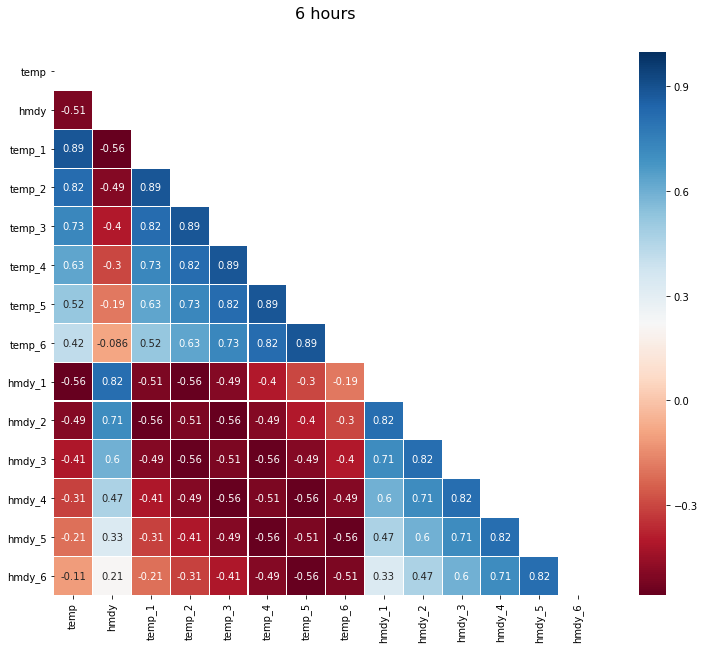

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'6 hours', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

BIBLIOGRAPHY
- https://opensource.com/article/17/9/messy-sensor-data
-
-
-
